### Poin-poin Assignment
1. Gunakan dataset flight.csv
2. Ikuti instruksi pada poin-poin assignments

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

#tambahkan library yang dibutuhkan

In [2]:
# Regresi california_dataset

df = pd.read_csv("1700131877947-flight.csv")
df.shape

(62988, 23)

## Data Dictionary
1. member_no : ID Member
2. ffp_date : Frequent Flyer Program Join Date
3. first_flight_date : Frist Flight Date
4. gender : Gender
5. ffp_tier : Tier of Frequent Flyer Program
6. work_city : City
7. work_province : Province
8. work_country : Country
9. age : Customer Age
10. load_time : The date data was retrieved
11. flight_count : Customer flight count
12. bp_sum : Flight plan
13. sum_yr_1 : Fare revenue
14. sum_yr_2 : Votes prices
15. seg_km_sum : Total disctance (km) traveled
16. last_flight_date : Last flight date
17. last_to_end : Distance of the last flight to the last airline company
18. avg_interval : Averange time distance
19. max_interval : Maximum time intervals
20. exchange_count :Exchange amount
21. avg_discount : Averange discount
22. points_sum : Customer point
23. point_notflight : Not used customer point

### Assignment 1
Dari 3 dataset diatas, pilih salah satu saja **(poin 10)**
1. Pahami dataset yang dipilih dengan cek dataset menggunakan : info(), sample(5), head(), tail() dan melihat value counts di tiap-tiap kolom.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,64,204855,85258.0,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16
43716,24609,2/3/2013,2/3/2013,Female,4,xian,shanxi,CN,28.0,3/31/2014,5,3745,650.0,2986.0,4442,11/30/2013,123,75.000000,135,0,0.869773,3745,0
15767,20509,5/23/2007,5/23/2007,Female,4,zhongqing,sichuan,CN,45.0,3/31/2014,19,13622,10010.0,4151.0,18806,1/16/2014,76,35.888889,178,0,0.812645,13622,0
32467,24143,12/27/2012,1/21/2013,Male,4,xianshi,shanxi,CN,36.0,3/31/2014,10,4675,746.0,5891.0,12306,1/30/2014,62,41.555556,173,0,0.541261,5504,4
9584,35474,1/19/2006,1/19/2006,Male,4,shenyang,liaoning,CN,47.0,3/31/2014,25,18644,8669.0,11527.0,32176,3/18/2014,14,27.708333,100,0,0.703342,21273,7


In [5]:
print(df[df['MAX_INTERVAL']<df['LAST_TO_END']])

       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
3          21189   8/22/2008         8/23/2008    Male         5  Los Angeles   
5          56972   2/10/2008         9/29/2009    Male         6    guangzhou   
35          3539  10/13/2009        10/13/2009    Male         4       UPLAND   
37         44936   3/30/2006          5/2/2007    Male         6  wulumuqishi   
49         22629   7/15/2010         7/15/2010    Male         5    SUMIDA-KU   
...          ...         ...               ...     ...       ...          ...   
62982      16415   1/20/2013         1/20/2013  Female         4      beijing   
62983      18375   5/20/2011          6/5/2013  Female         4    guangzhou   
62984      36041    3/8/2010         9/14/2013    Male         4       foshan   
62986      61027    2/6/2013         2/14/2013  Female         4    guangzhou   
62987      61340   2/17/2013         2/17/2013  Female         4     shanghai   

      WORK_PROVINCE WORK_CO

In [6]:
print(df.head())
print(df.tail())

   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SUM_YR_1  \
0       beijing           CN  31.0  3/31/2014           210  505308  239560.0   
1       beijing           CN  42.0  3/31/2014           140  362480  171483.0   
2       beijing           CN  40.0  3/31/2014           135  351159  163618.0   
3            CA           US  64.0  3/31/2014            23  337314  116350.0   
4       guizhou           CN  48.0  3/31/2014           152  273844  124560.0   

   SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  AVG_INT

In [7]:
for col in df.columns:
  print(df[col].value_counts())

54993    1
44438    1
45331    1
55783    1
49635    1
        ..
62417    1
33259    1
32017    1
50950    1
61340    1
Name: MEMBER_NO, Length: 62988, dtype: int64
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64
Male      48134
Female    14851
Name: GENDER, dtype: int64
4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64
gu

Ada beberapa data yang memiliki missing value, namun sepertinya jumlahnya tidak terlalu banyak. Terdapat juga data yang memiliki value yang aneh seperti tanggal LAST_FLIGHT_DATE yang tertera sebagai 29 Februari 2014. Nanti prosedur imputation dan replacement akan dilakukan untuk memperbaiki data data tersebut.

Terdapat juga salah satu variabel yang menarik yaitu FFP_TIER yang sepertinya merupakan tingkatan level FFP. FFP sendiri merupakan Frequent Flyer Program yang sepertinya berkaitan dengan pemberian poin penerbangan kepada customer loyal. Nanti saya juga akan coba membandingkan FFP_TIER dengan beberapa parameter lainnya terkait bonus poin.

### Assignment 2 : Lakukan EDA untuk kolom numerik dan kategorikal, silahkan saudara eksplor. (Poin 30)

Pertama, saya ingin mengetahui background demografi para member FFP. Dari grafik dibawah sepertinya sebagian besar member FFP adalah laki-laki. Ini mungkin disebabkan karena banyaknya member laki-laki yang menggunakan jasa penerbangan untuk keperluan kerja.

Selain itu sebagian besar lokasi kerja para member adalah di beberapa wilayah di Cina. Untuk sementara kesimpulan yang paling mungkin adalah sebagian besar member adalah warga negara Cina, atau data yang kita gunakan berasal dari data maskapai penerbangan Cina.

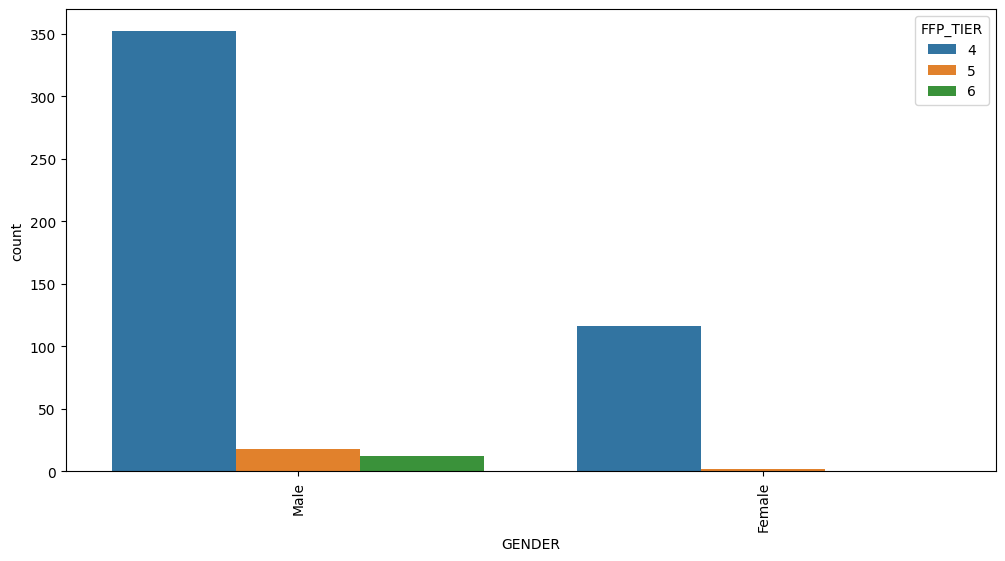

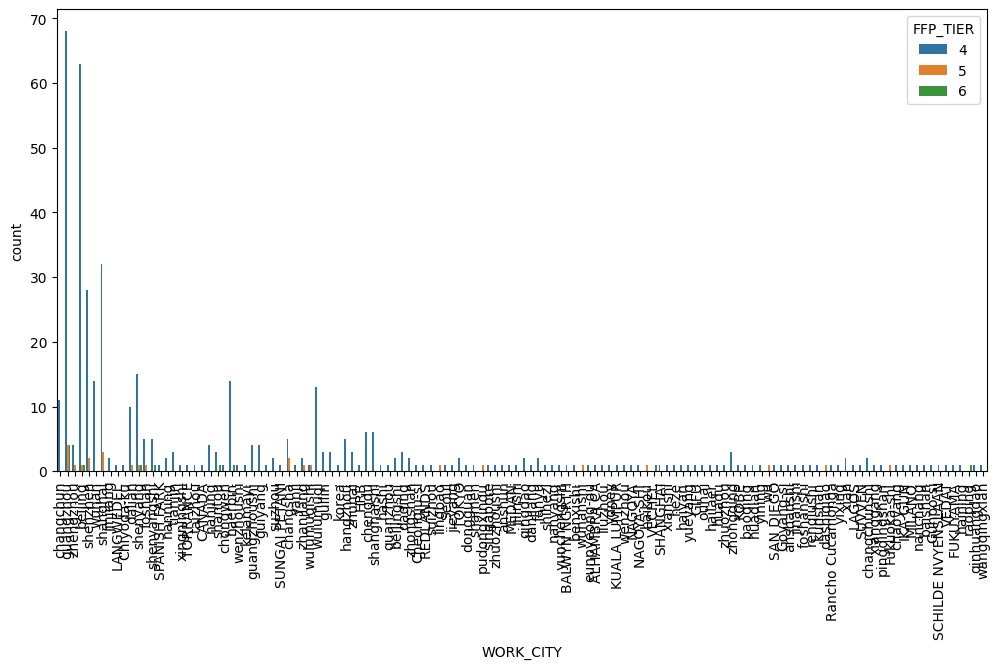

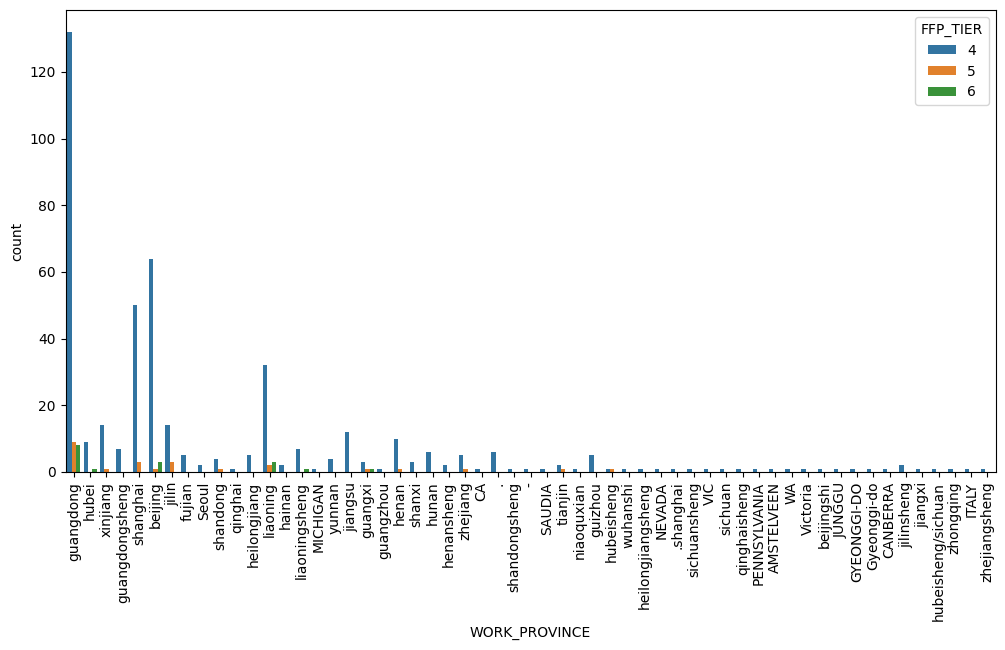

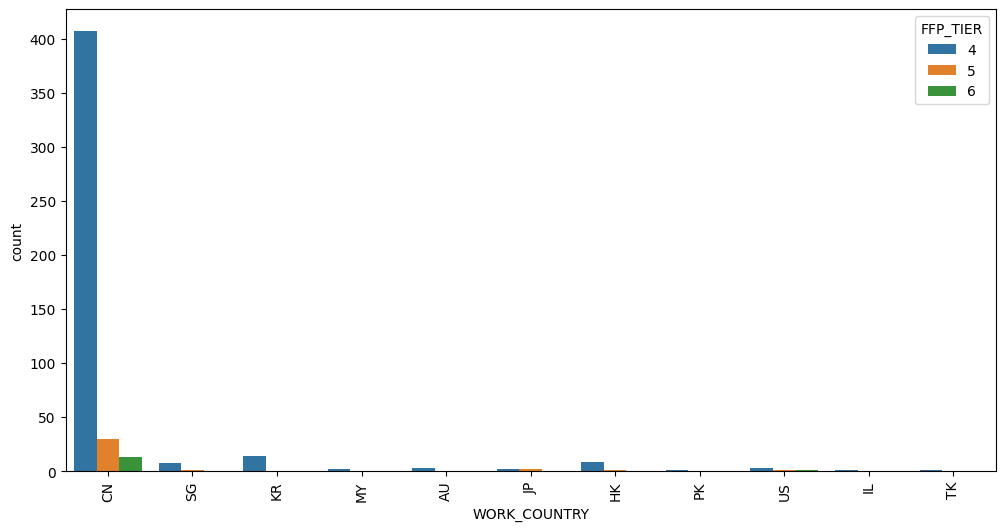

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for features vs FFP_TIER
for col in ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']:
  plt.figure(figsize=(12, 6))
  sns.countplot(x=col, hue='FFP_TIER', data=df.sample(500))
  plt.xticks(rotation=90)
  plt.show()

Sekarang saya akan coba membandingkan FFP_TIER dengan parameter bonus poin seperti Points_Sum, SUM_YR_1, dan SUM_YR_2. Saya juga akan membandingkan FFP_TIER dengan parameter yang akan kita gunakan untuk RFM analysis yaitu 'LAST_TO_END' (Recency), 'FLIGHT_COUNT' (Frequency), dan 'SEG_KM_SUM' (Monetary).

Dari hasil plot dibawah terlihat bahwa semakin tinggi FFP_TIER semakin tinggi kecenderungan nilai poin yang dikumpulkan, dan juga nilai RFM nya. Meskipun terdapat overlap pada rentang nilai masing-masing variable, namun secara konsisten dapat terlihat bahwa peningkatan FFP_TIER, nilai mean-nya tiap variable juga semakin meningkat (atau menurun, tergantung variable yang dinilai).

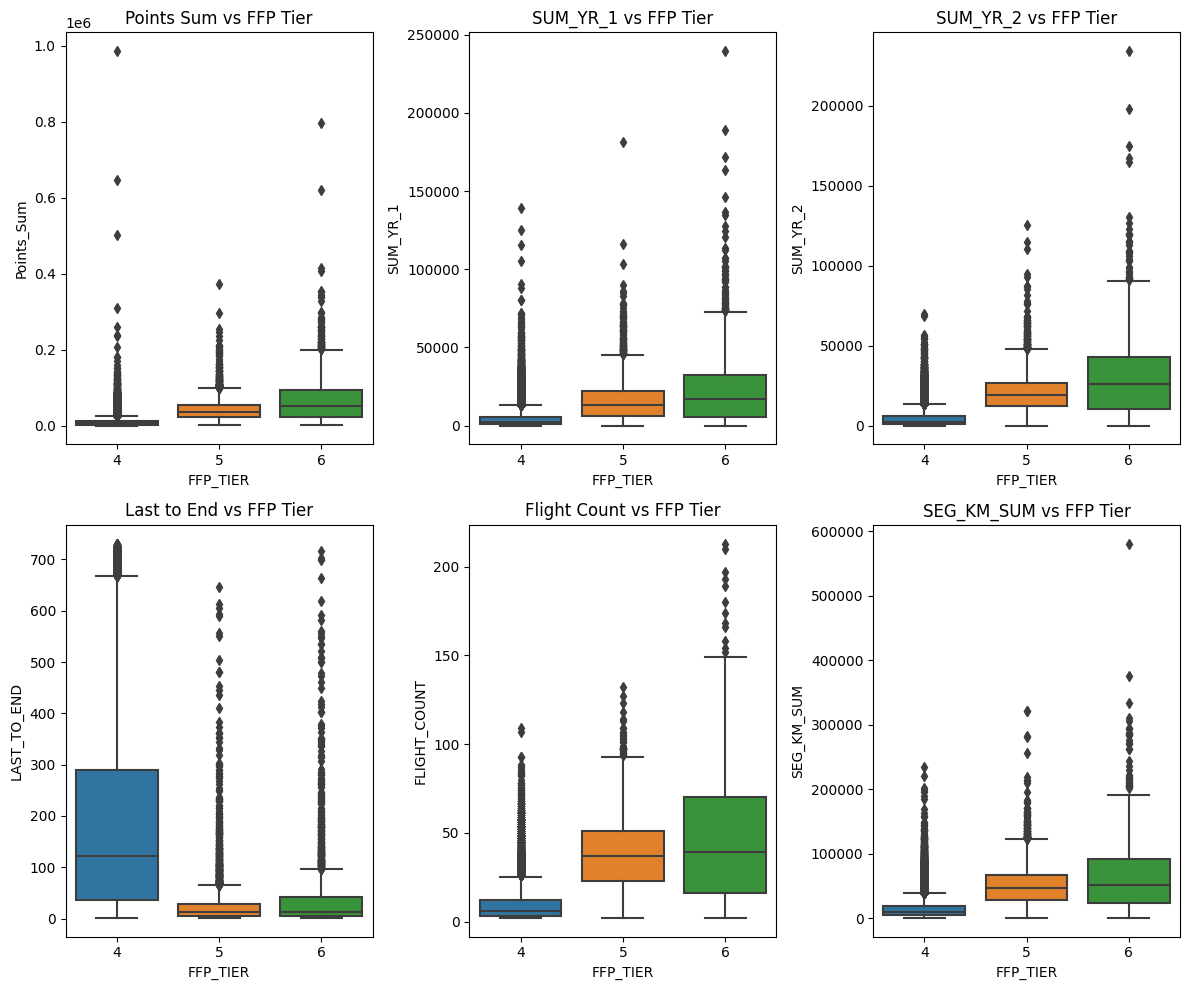

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn for box plots
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Boxplot for Points_Sum
sns.boxplot(x='FFP_TIER', y='Points_Sum', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Points Sum vs FFP Tier')

# Boxplot for SUM_YR_1
sns.boxplot(x='FFP_TIER', y='SUM_YR_1', data=df, ax=axs[0, 1])
axs[0, 1].set_title('SUM_YR_1 vs FFP Tier')

# Boxplot for SUM_YR_2
sns.boxplot(x='FFP_TIER', y='SUM_YR_2', data=df, ax=axs[0, 2])
axs[0, 2].set_title('SUM_YR_2 vs FFP Tier')

# Boxplot for Last_to_End
sns.boxplot(x='FFP_TIER', y='LAST_TO_END', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Last to End vs FFP Tier')

# Boxplot for Flight_Count
sns.boxplot(x='FFP_TIER', y='FLIGHT_COUNT', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Flight Count vs FFP Tier')

# Boxplot for SEG_KM_SUM
sns.boxplot(x='FFP_TIER', y='SEG_KM_SUM', data=df, ax=axs[1, 2])
axs[1, 2].set_title('SEG_KM_SUM vs FFP Tier')

plt.tight_layout()
plt.show()

Terakhir, saya rasa kita perlu mengecek hubungan variabel 'AVG_INTERVAL', 'MAX_INTERVAL', dan 'LAST_TO_END' dengan 'SEG_KM_SUM' karena secara logis harusnya mereka berbanding terbalik. Jika ternyata benar, maka data kita sudah cukup sahih.

Terlihat bahwa data kita sudah cukup sahih jika dilihat dari plot dibawah.

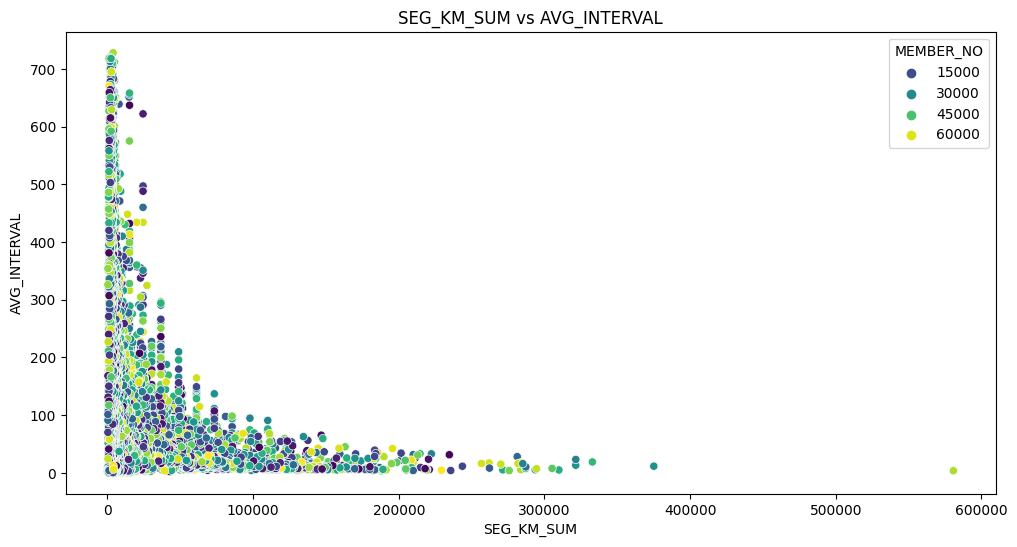

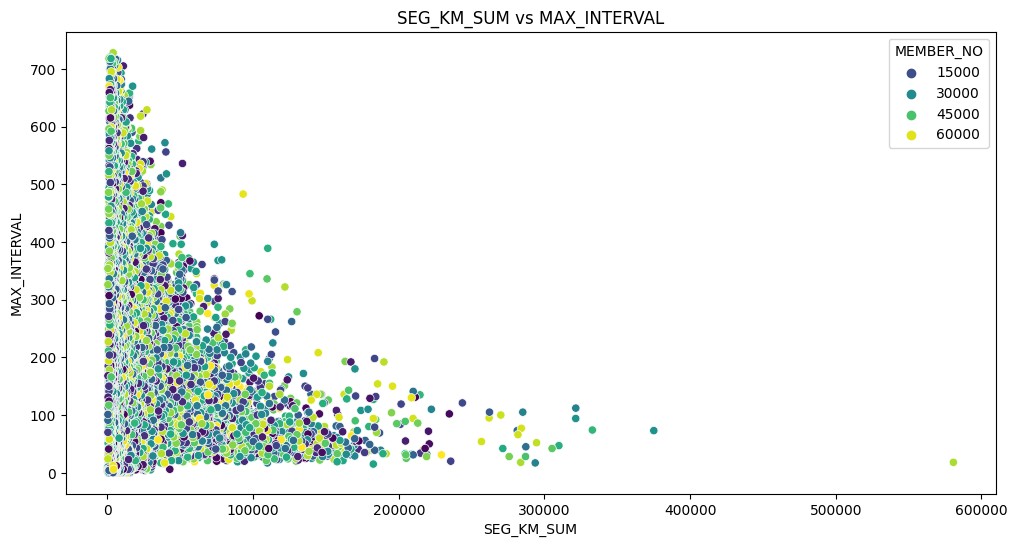

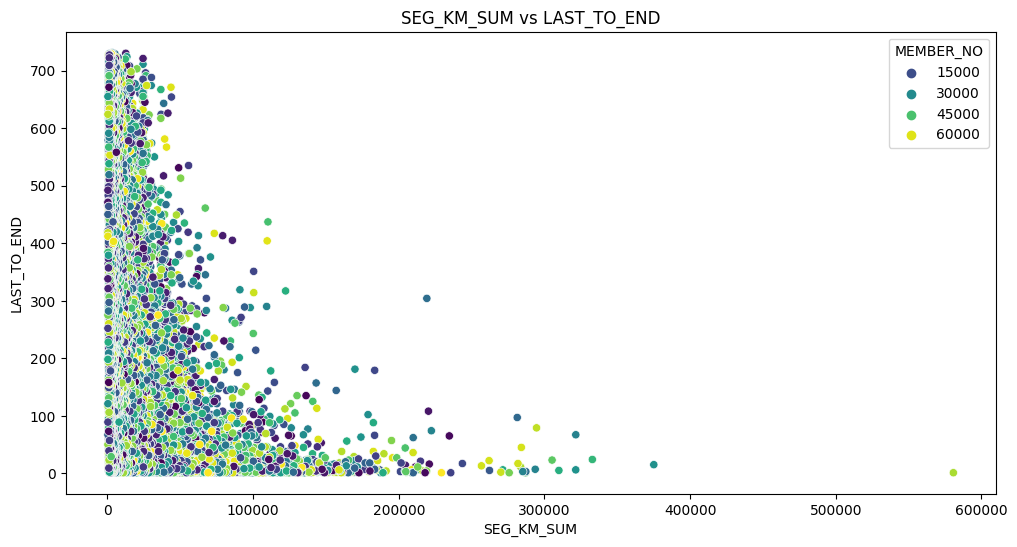

In [10]:
# Scatter plot of SEG_KM_SUM vs AVG_INTERVAL
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SEG_KM_SUM', y='AVG_INTERVAL', data=df, hue='MEMBER_NO', palette='viridis')
plt.title('SEG_KM_SUM vs AVG_INTERVAL')
plt.xlabel('SEG_KM_SUM')
plt.ylabel('AVG_INTERVAL')
plt.show()

# Scatter plot of SEG_KM_SUM vs MAX_INTERVAL
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SEG_KM_SUM', y='MAX_INTERVAL', data=df, hue='MEMBER_NO', palette='viridis')
plt.title('SEG_KM_SUM vs MAX_INTERVAL')
plt.xlabel('SEG_KM_SUM')
plt.ylabel('MAX_INTERVAL')
plt.show()

# Scatter plot of SEG_KM_SUM vs LAST_TO_END
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SEG_KM_SUM', y='LAST_TO_END', data=df, hue='MEMBER_NO', palette='viridis')
plt.title('SEG_KM_SUM vs LAST_TO_END')
plt.xlabel('SEG_KM_SUM')
plt.ylabel('LAST_TO_END')
plt.show()

Terakhir saya juga ingin memastikan hubungan antara LAST_TO_END dengan MAX_INTERVAL dan 'AVG_INTERVAL'. Seharusnya semakin recent penerbangan seorang member (LAST_TO_END nya kecil), semakin kecil juga MAX_INTERVAL dan AVG_INTERVAL nya.

Dan terlihat dari hasil plot dibawah di zona segitiga bagian atas dari AVG_INTERVAL dan MAX_INTERVAL terlihat lebih renggang dibanding segitiga dibawahnya. Hal ini berarti bahwa member penerbangan memiliki karakteristik yang bermacam-macam. Ada yang baru-baru ini melakukan penerbangan namun sebelumnya jarang sekali melakukan penerbangan. Ada juga yang sudah lama tidak melakukan penerbangan namun dulunya cukup sering melakukan penerbangan. Namun sesuai dugaan yang paling masuk akal, yang paling umum adalah member yang baru saja melakukan penerbangan dan termasuk yang cukup sering melakukan penerbangan, maupun member yang sudah lama tidak melakukan penerbangan dan jarang melakukan penerbangan. Sifat yang paling umum tersebut ditandai oleh bagian segitiga yang lebih padat.

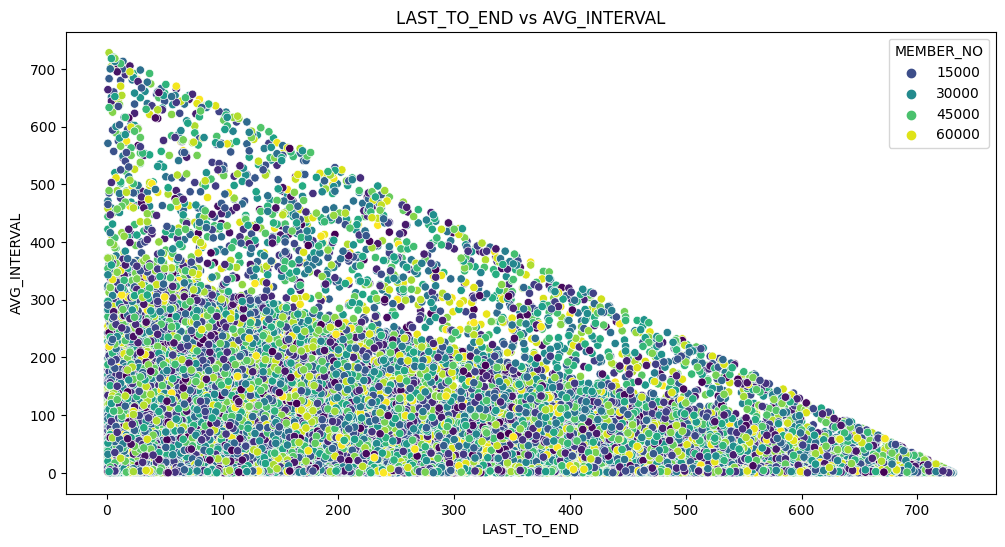

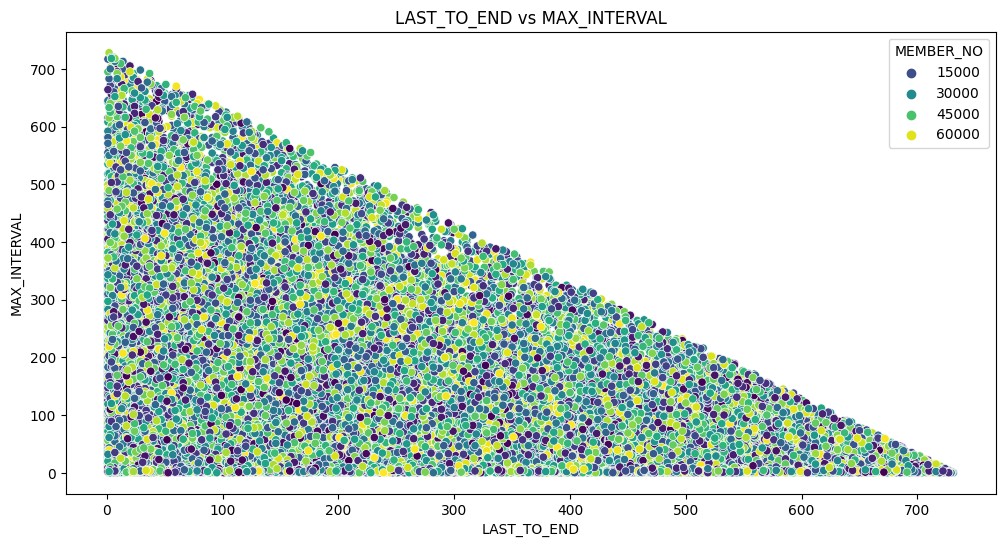

In [11]:
# Scatter plot of LAST_TO_END vs AVG_INTERVAL
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LAST_TO_END', y='AVG_INTERVAL', data=df, hue='MEMBER_NO', palette='viridis')
plt.title('LAST_TO_END vs AVG_INTERVAL')
plt.xlabel('LAST_TO_END')
plt.ylabel('AVG_INTERVAL')
plt.show()

# Scatter plot of LAST_TO_END vs MAX_INTERVAL
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LAST_TO_END', y='MAX_INTERVAL', data=df, hue='MEMBER_NO', palette='viridis')
plt.title('LAST_TO_END vs MAX_INTERVAL')
plt.xlabel('LAST_TO_END')
plt.ylabel('MAX_INTERVAL')
plt.show()

Setelah mendapatkan beberapa pemahaman diatas, kita dapat membuat keputusan yang lebih baik untuk melakukan feature engineering.

### Assignment 3 : Lakukan Feature Egnineering (poin 20)
1. Drop duplikat
2. Cek missing value
3. Ubah tipe data jika tidak sesuai, misal seharusnya datetime tapi object, maka ubah object menjadi datetime.
4. Lakukan StandarScaller untuk feature scalling
* unsupervised tidak perlu splitting data


Pertama saya drop duplikat.

In [12]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Kemudian saya ganti tanggal tahun kabisat yang bermasalah pada LAST_FLIGHT_DATE menjadi tanggal LOAD_TIME (tanggal input data) dikurangi LAST_TO_END (selisih tanggal hingga penerbangan terakhir sebelumnya).

In [13]:
# Replace '2014/2/29' with 'LOAD_TIME' minus 'LAST_TO_END'
df['LAST_FLIGHT_DATE'] = df.apply(
    lambda row: pd.to_datetime(row['LOAD_TIME']) - pd.DateOffset(days=row['LAST_TO_END']) + pd.DateOffset(days=1)
    if '2014/2/29' in row['LAST_FLIGHT_DATE'] else row['LAST_FLIGHT_DATE'],
    axis=1)

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  object        
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

Karena masih banyak missing value, saya akan lakukan imputation. Imputation dilakukan karena missing value tidak terlalu banyak, maksimum hanya di angka 3% seperti tertera pada penjabaran dibawah.

In [14]:
for col in df.columns:
    nan_percentage = len(df[col][df[col].isna()]) / len(df) * 100
    print(f'{col} NaN percentage: {nan_percentage:.2f}%')

MEMBER_NO NaN percentage: 0.00%
FFP_DATE NaN percentage: 0.00%
FIRST_FLIGHT_DATE NaN percentage: 0.00%
GENDER NaN percentage: 0.00%
FFP_TIER NaN percentage: 0.00%
WORK_CITY NaN percentage: 3.60%
WORK_PROVINCE NaN percentage: 5.16%
WORK_COUNTRY NaN percentage: 0.04%
AGE NaN percentage: 0.67%
LOAD_TIME NaN percentage: 0.00%
FLIGHT_COUNT NaN percentage: 0.00%
BP_SUM NaN percentage: 0.00%
SUM_YR_1 NaN percentage: 0.87%
SUM_YR_2 NaN percentage: 0.22%
SEG_KM_SUM NaN percentage: 0.00%
LAST_FLIGHT_DATE NaN percentage: 0.00%
LAST_TO_END NaN percentage: 0.00%
AVG_INTERVAL NaN percentage: 0.00%
MAX_INTERVAL NaN percentage: 0.00%
EXCHANGE_COUNT NaN percentage: 0.00%
avg_discount NaN percentage: 0.00%
Points_Sum NaN percentage: 0.00%
Point_NotFlight NaN percentage: 0.00%


Untuk prosedur imputation saya hanya akan mengganti nilai NaN kategorik dengan nilai modus, dan nilai NaN numerik dengan median.

In [15]:
from sklearn.impute import SimpleImputer

cat_impute=SimpleImputer(strategy='most_frequent')
num_impute=SimpleImputer(strategy='median')

for col in df.select_dtypes('object').columns:
  df[col]=cat_impute.fit_transform(df[[col]])

for col in df.select_dtypes(['int64','float64']).columns:
  df[col]=num_impute.fit_transform(df[[col]])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  float64       
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  float64       
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  object        
 10  FLIGHT_COUNT       62988 non-null  float64       
 11  BP_SUM             62988 non-null  float64       
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

Terakhir, sebelum melakukan scaling saya mau melihat distribusi data.

Dari plot dibawah terlihat sepertiny ada banyak sekali outlier pada data kita. Saya tidak mau membuang data outlier karena data tersebut masih masuk akal. Scaler yang paling cocok untuk menangani outlier adalah Standard Scaler.

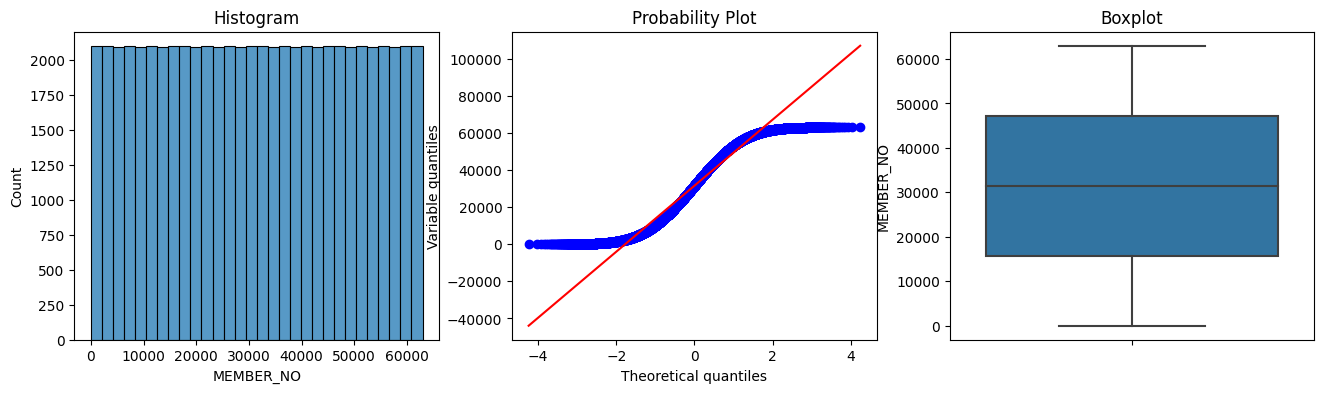

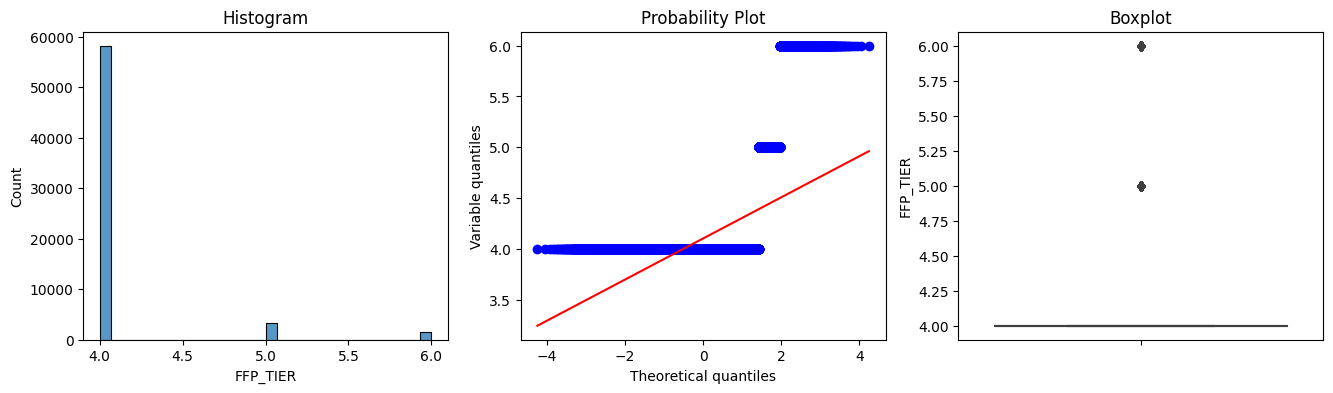

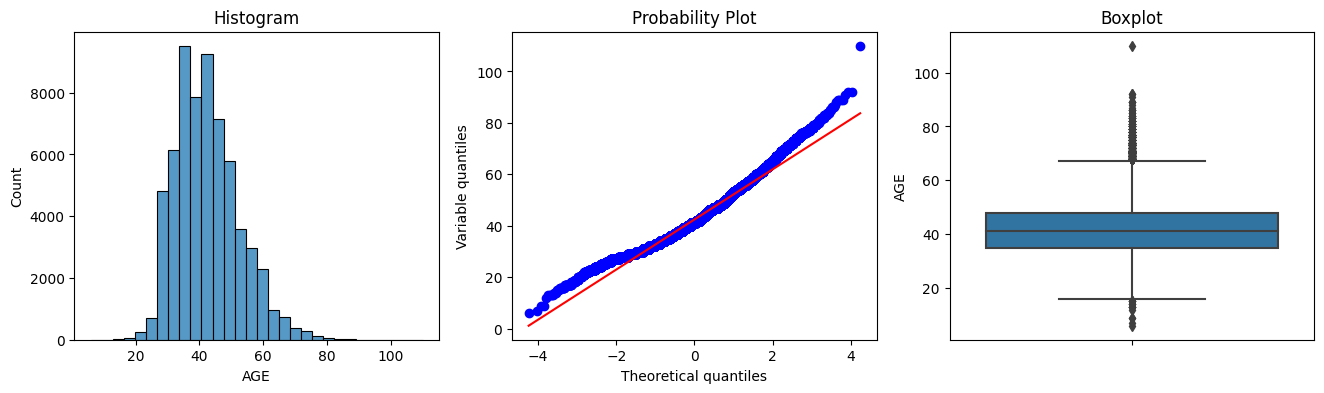

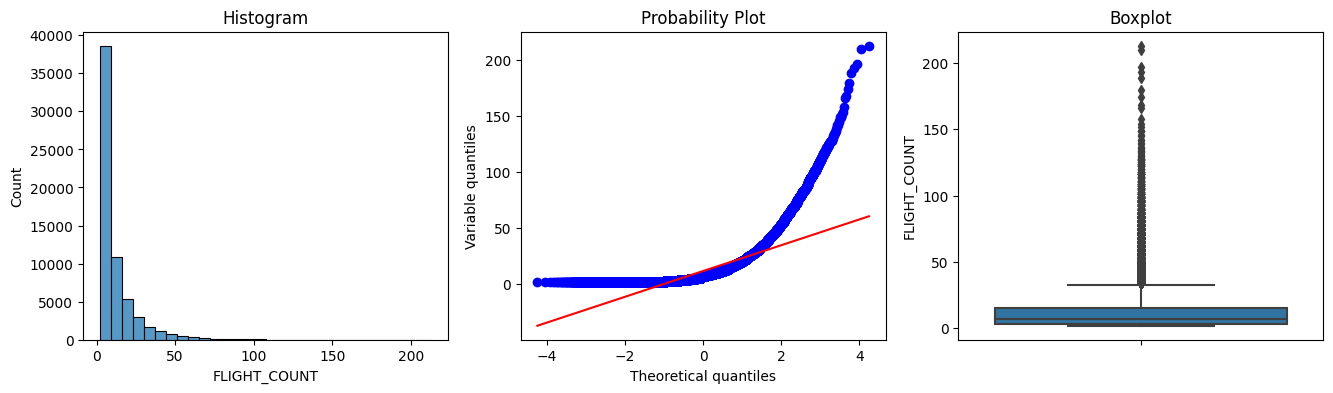

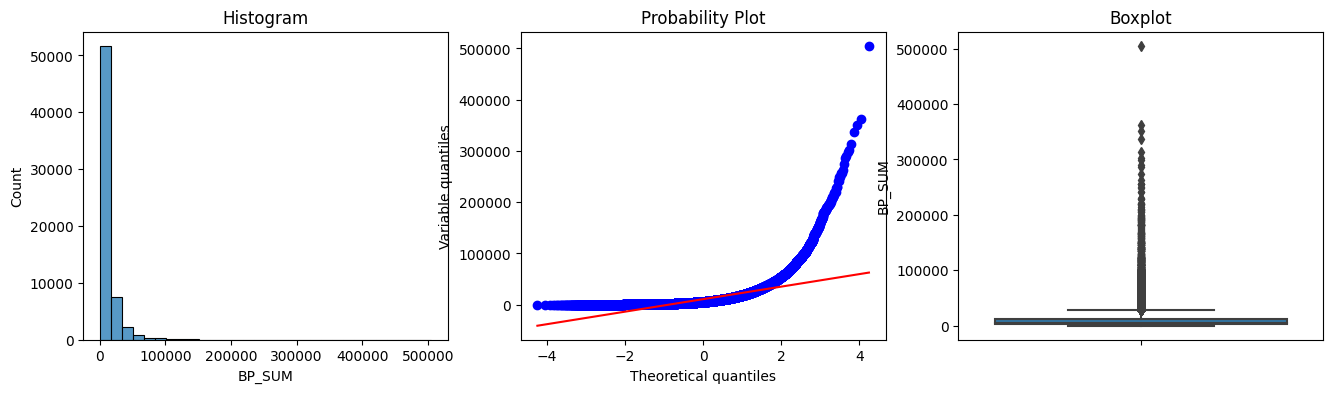

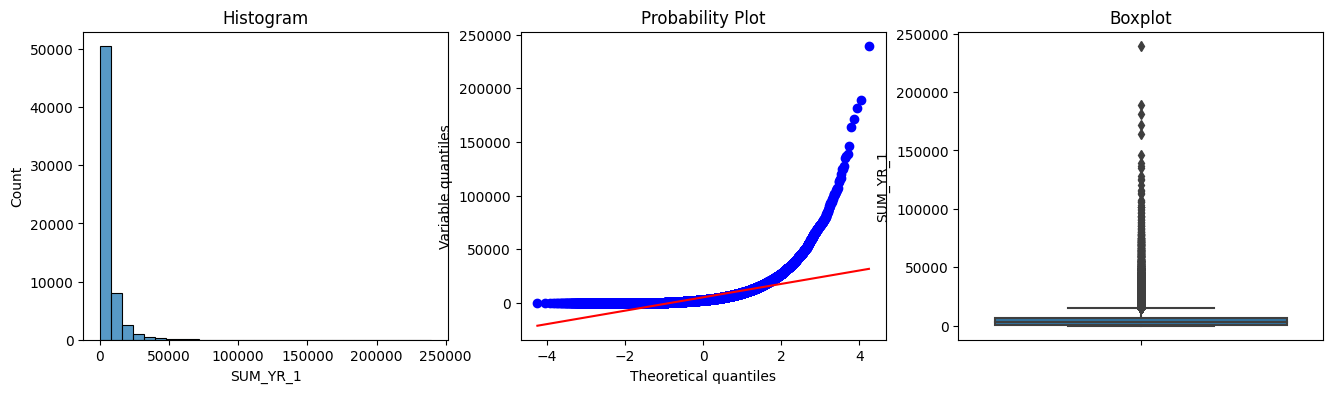

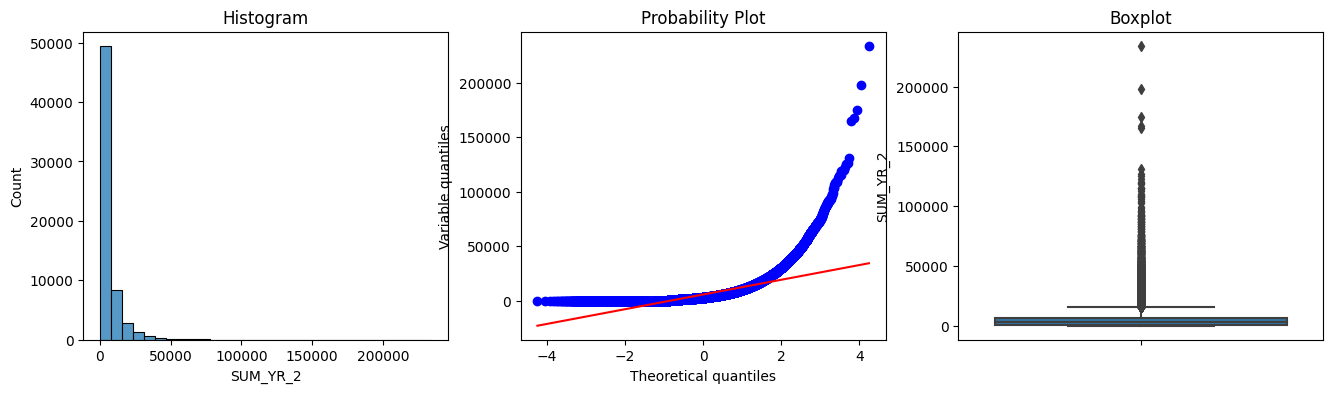

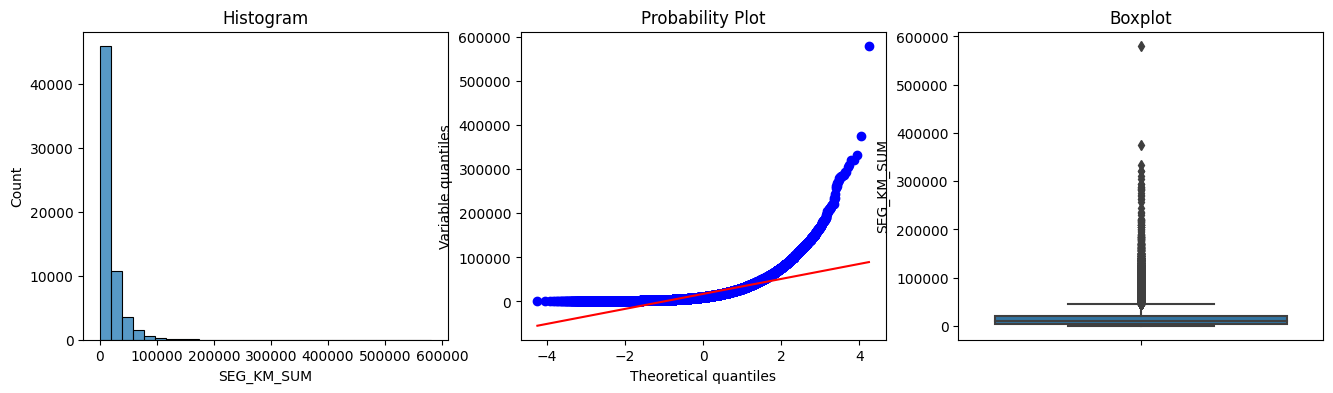

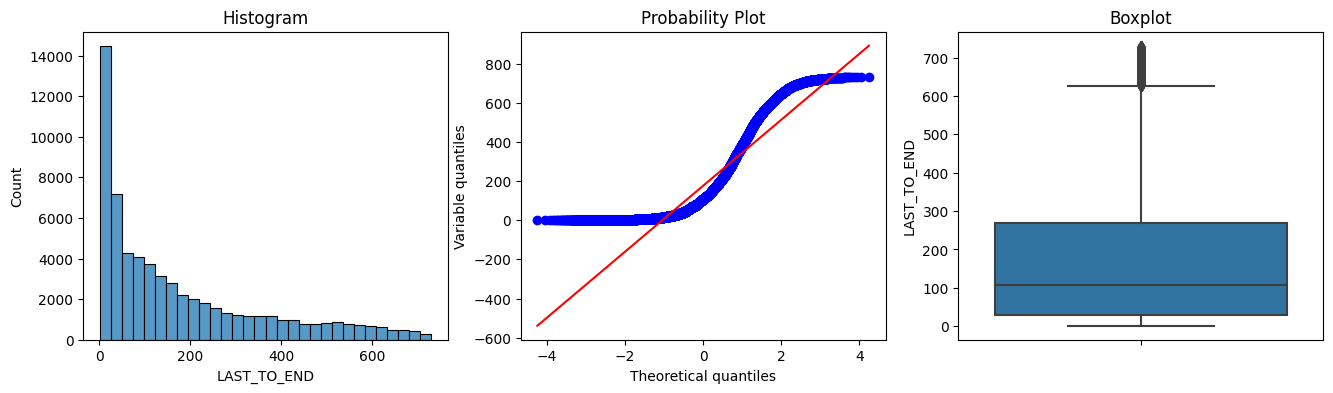

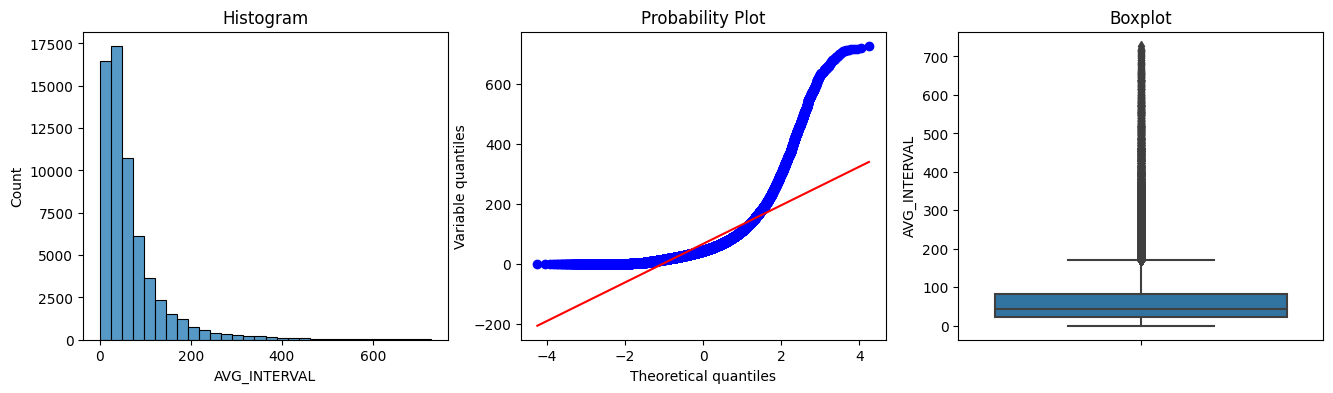

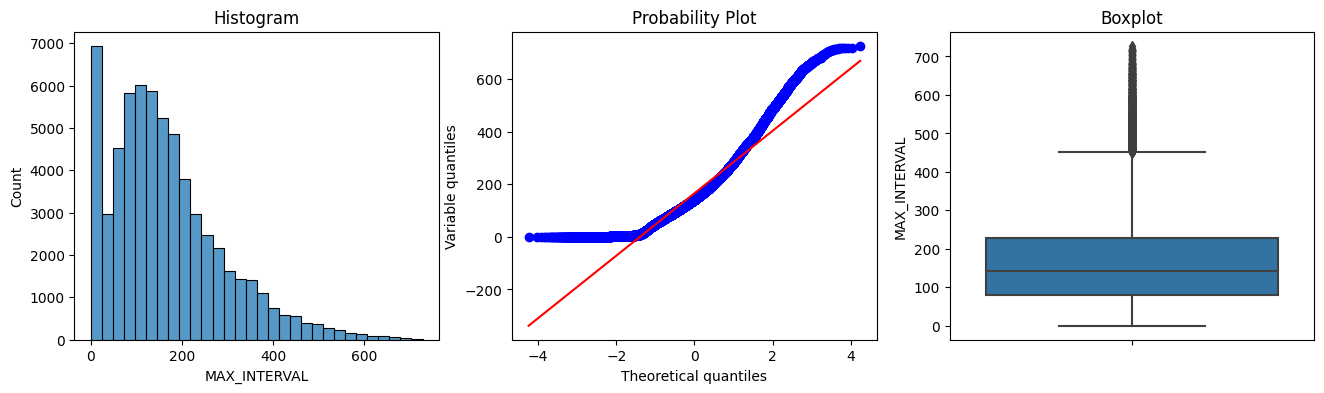

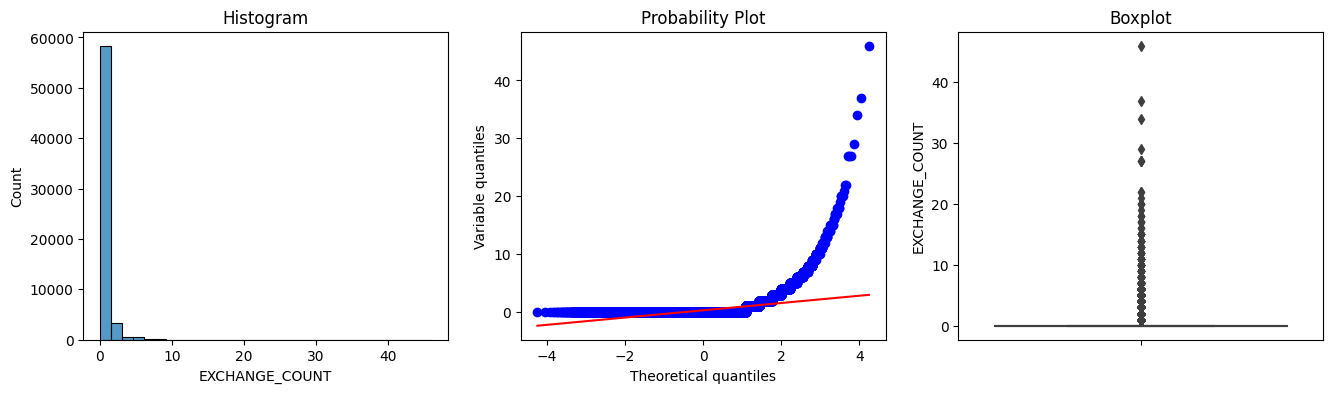

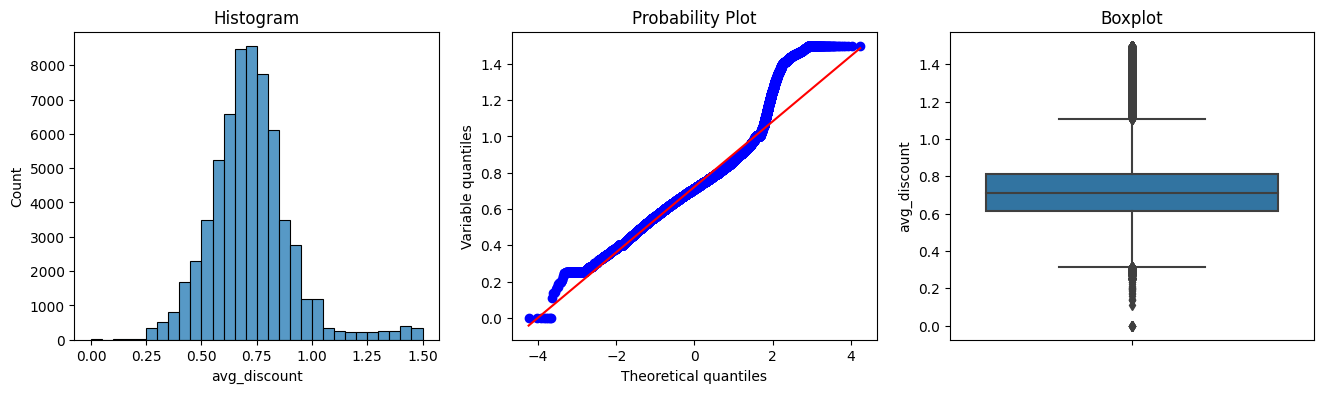

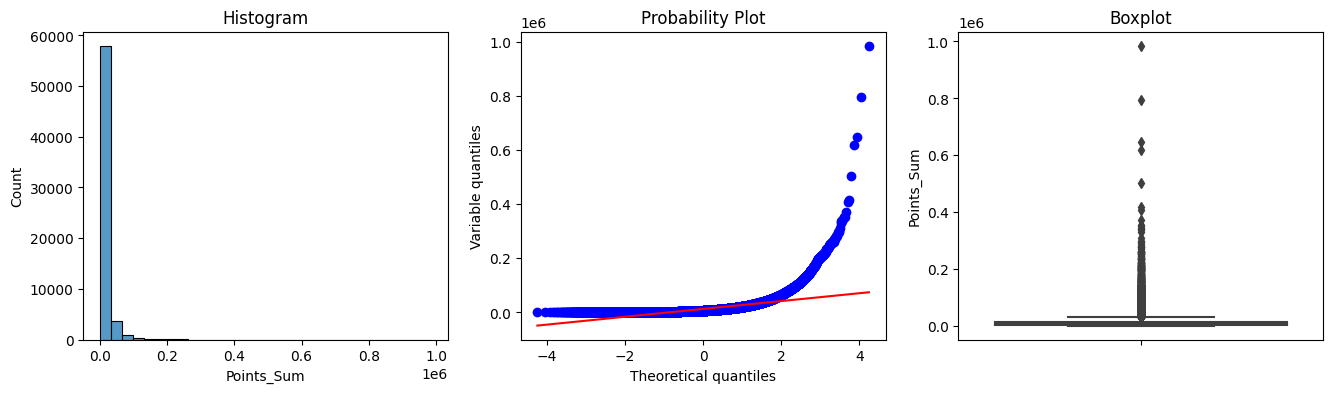

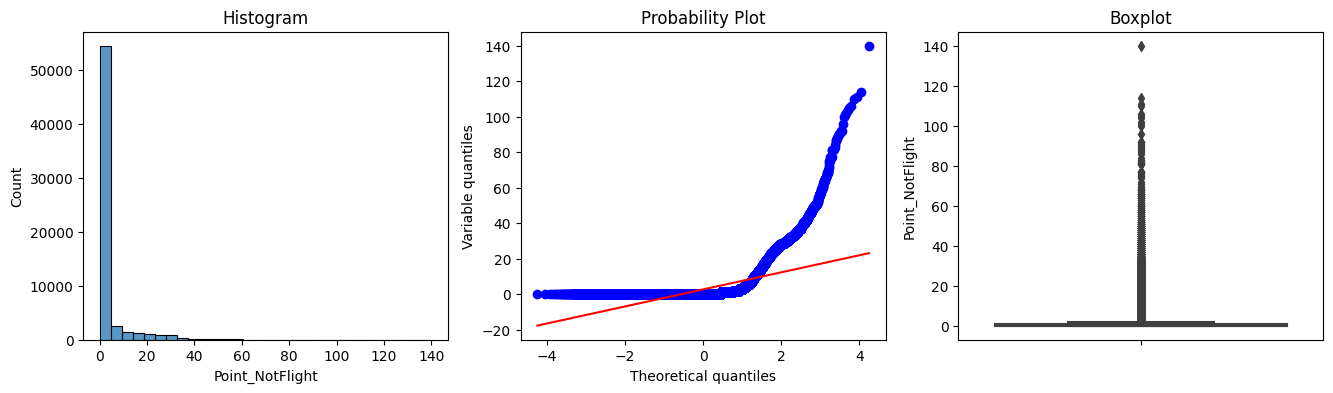

In [16]:
import scipy.stats as stats

def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in df.select_dtypes(['int64','float64']).columns:
  check_plot(df,col)

Saya akan membuat dataframe baru bernama rfm yang nantinya akan discaling dan dijadikan bahan untuk membuat rfm analysis.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

rfm=df.copy()

for col in rfm.select_dtypes(['int64','float64']).columns:
  rfm[col]=scaler.fit_transform(rfm[[col]])

### Assignment 4. RFM dengan K-Means (Poin 40)
1. Gunakan kolom 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM'.
2. Pastikan kolom tersebut sudah dilakukan StandarScaller
3. Jika ingin remove outlier silahkan, gunakan IQR saja
4. Gunakan Elbow Method untuk K-Means
5. Lakukan interpretasi bisnis dan juga hasil dari k-means, plotting tiap recency,frequency,monetary

In [18]:
# Recency (R) = kolom Last_to_end
# Frequency (F) = kolom flight_count
# Monetary (M) = kolom SEG_KM_SUM

Pertama saya filter dulu ketiga komponen RFM.

In [19]:
rfm = rfm[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
rfm.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,-0.952668,14.104600,26.888115
1,-0.920027,9.122166,13.193949
2,-0.898267,8.766278,12.718487
3,-0.430420,0.794384,12.605132
4,-0.930907,9.976297,13.969210


Kemudian saya akan menggunakan metode K Elbow untuk menentukan jumlah cluster yang optimum. Terlihat bahwa jumlah cluster yang optimum adalah 4.

Text(0, 0.5, 'Intertia / WSS')

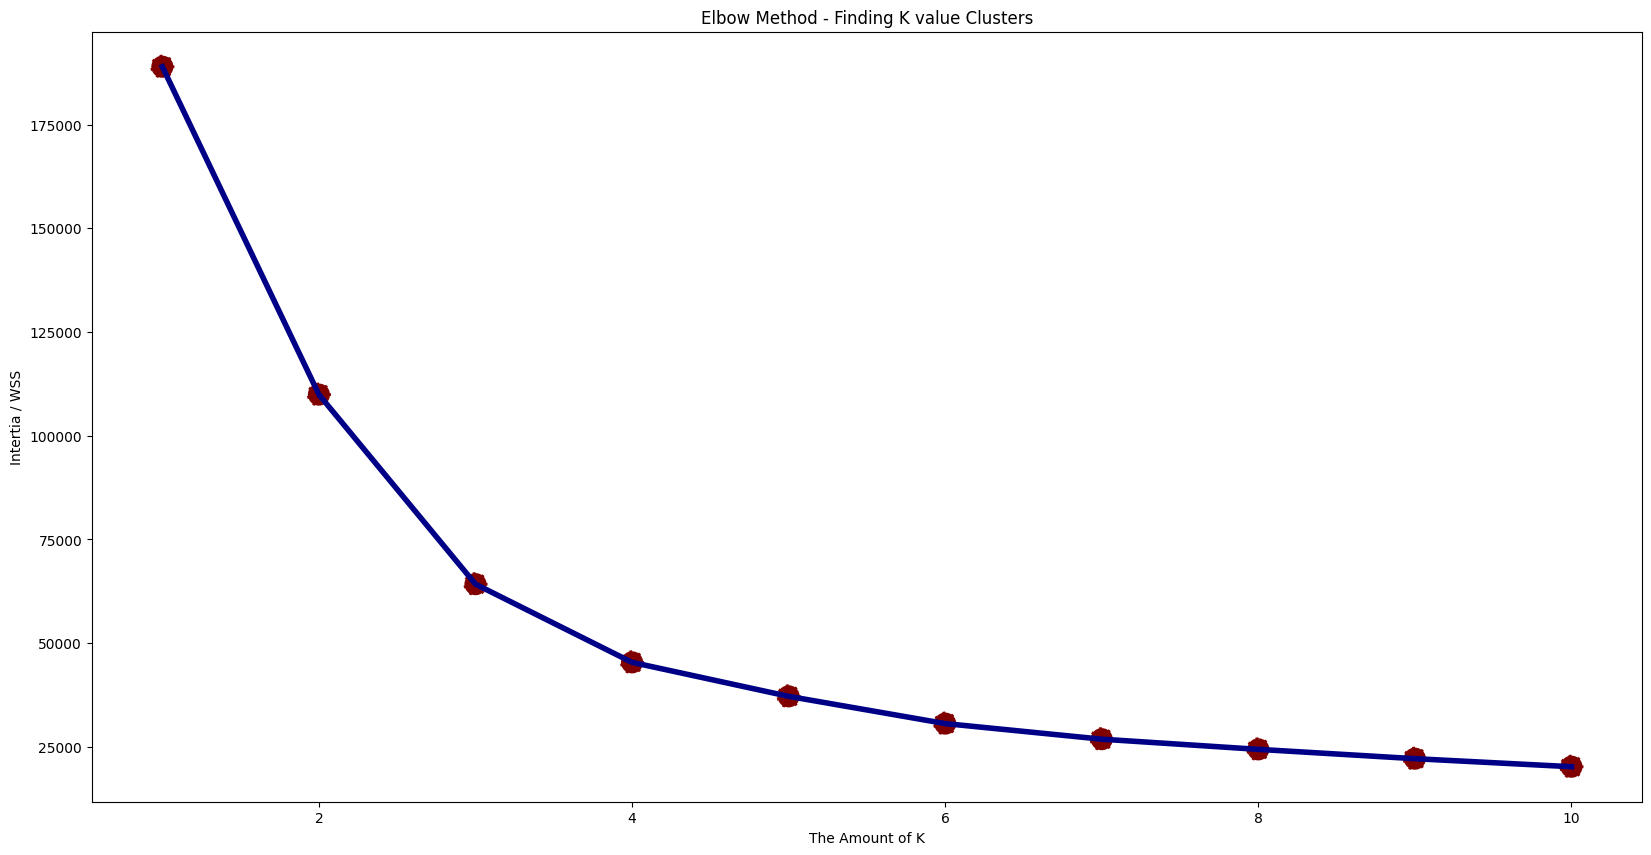

In [20]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

Kemudian saya ekstrak label dari keempat cluster tersebut dan saya anotasikan pada kolom baru yaitu 'cluster_elbow' baik di dataframe df maupun rfm. rfm adalah dataframe yang sudah discale sedangkan df merupakan dataframe yang belum discale.

In [21]:
#Menambahkan label cluster_elbow ke dataframe
kmeans_elbow = KMeans(n_clusters=4, random_state=0)
kmeans_elbow.fit(rfm.values)
df['cluster_elbow'] = kmeans_elbow.labels_
rfm['cluster_elbow'] = kmeans_elbow.labels_
rfm.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,cluster_elbow
0,-0.952668,14.104600,26.888115,2
1,-0.920027,9.122166,13.193949,2
2,-0.898267,8.766278,12.718487,2
3,-0.430420,0.794384,12.605132,2
4,-0.930907,9.976297,13.969210,2


Kemudian saya coba pairplot dataframe rfm. Terlihat bahwa sepertinya kita dapat membagi customer kita jadi 4 golongan:

1. Customer baru (ungu). Baru baru ini melakukan penerbangan, dan belum terlalu sering terbang
2. Customer lost (biru). Sudah lama tidak terbang dan frekuensi terbangnya juga rendah
3. Customer berharga (hijau). Baru-baru ini terbang dan sebelumnya juga sudah sering terbang
4. Customer prospek menarik (kuning). Sama seperti customer baru, hanya saja sebelumnya sudah lebih sering terbang dibanding customer baru.

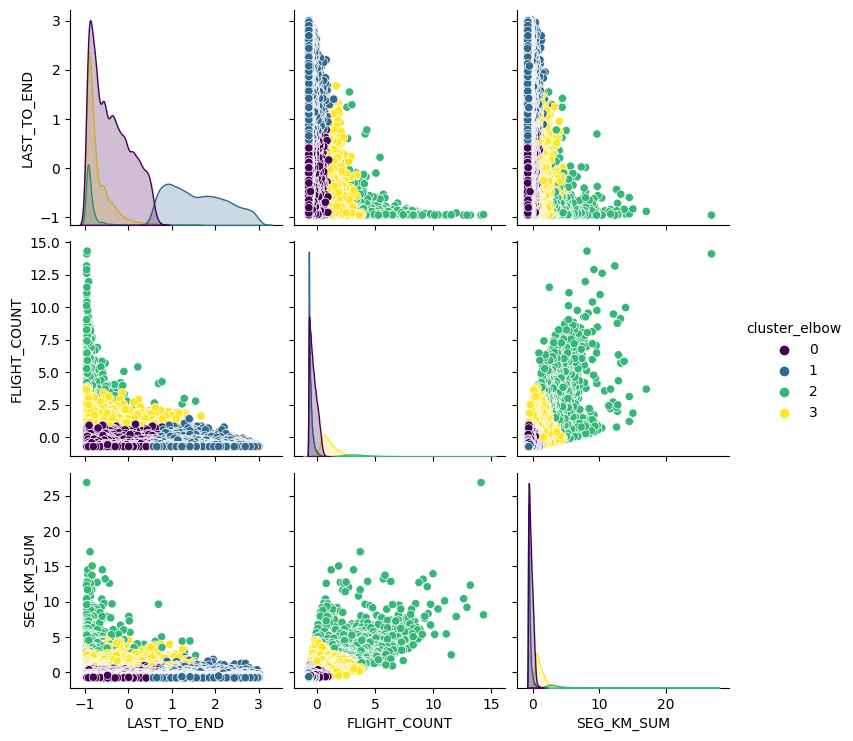

In [22]:
sns.pairplot(rfm, hue='cluster_elbow', palette='viridis', height=2.5)
plt.show()

Oleh karena itu saya akan ubah label masing-masing cluster agar lebih informatif. Kemudian akan saya anotasikan pada dataframe df yang belum discale.

In [23]:
mapping = {
    0: 'High Recency, Low Flights: New Prospects',
    1: 'Low Recency, Low Flights: Lost Deals',
    2: 'High Recency, High Flights: VIP',
    3: 'High Recency, Medium Flights: Interesting Prospects'
}

df['cluster_elbow'] = df['cluster_elbow'].replace(mapping)

Hasilnya seperti dibawah.

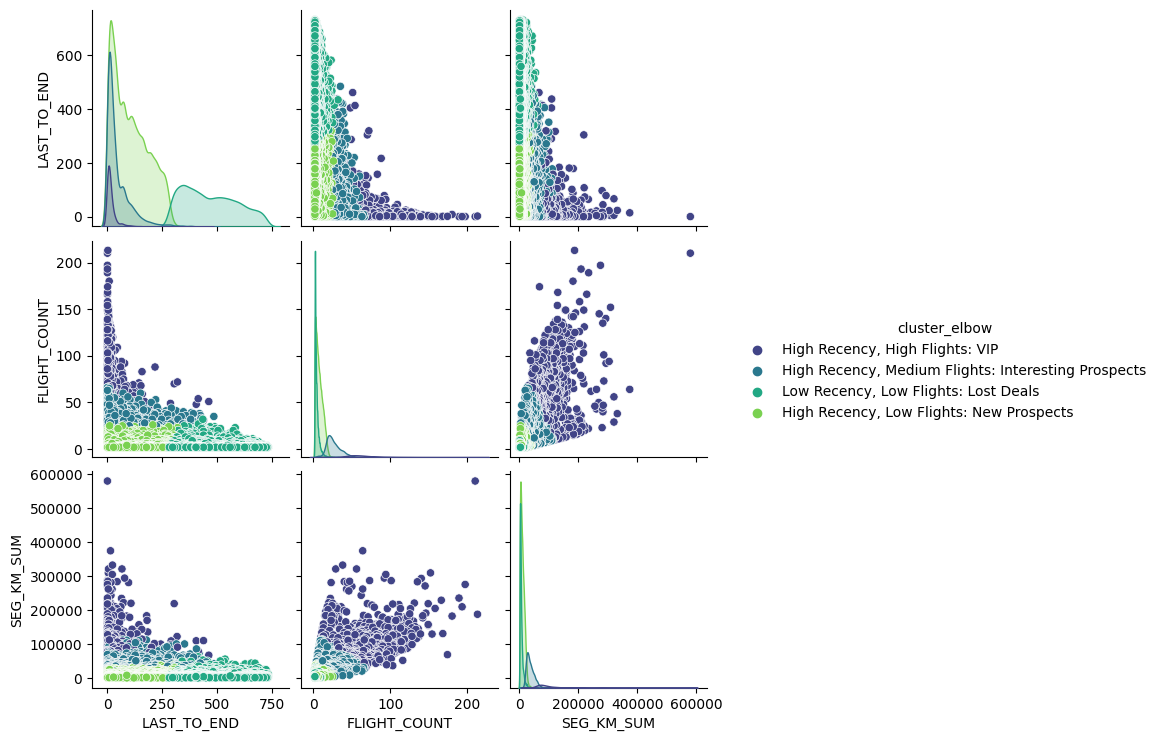

In [24]:
sns.pairplot(df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','cluster_elbow']], hue='cluster_elbow', palette='viridis', height=2.5)
plt.show()

Kesimpulannya, sebaiknya kita tidak terlalu fokus pada customer lost deals, dan lebih fokus pada customer VIP dan interesting prospects. Misalnya untuk customer VIP kita bisa mempertahankan saja service selama ini. Sedangkan untuk customer interesting prospects kita bisa tawarkan promo yang lebih menarik dibanding customer VIP, untuk sementara waktu. Untuk customer new prospects, bisa diberikan promo yang lebih simpel.

# LinkedIn Post: https://www.linkedin.com/posts/alfian-kamil_machinelearning-artificialintelligence-rfm-activity-7136428372078841856-ATbH?utm_source=share&utm_medium=member_desktop